In [35]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import os
import cmath
from numpy.polynomial import Polynomial
from sklearn.metrics import r2_score

Data Acquisition

In [65]:
dataexp_1 = pd.read_excel(r'C:\Users\nelso\OneDrive\Documentos\01_alluminio_frattale_raw.xlsx', 'Part I')


lengths =  np.array(dataexp_1['Mean Length'])
mass = np.array(dataexp_1['Mean Mass'])



print(ln_lengths)

[3.36787038 3.25873736 3.13549422 2.99656526 2.83419326 2.63905733
 2.39789527 2.07735604 1.60943791 1.09861229]


Plots Setup

In [11]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 15,
    "font.size": 15,
    "legend.fontsize": 10,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

Part I: Aluminum foil squares 

[ 0.0032722   0.00245598 -0.01731805]


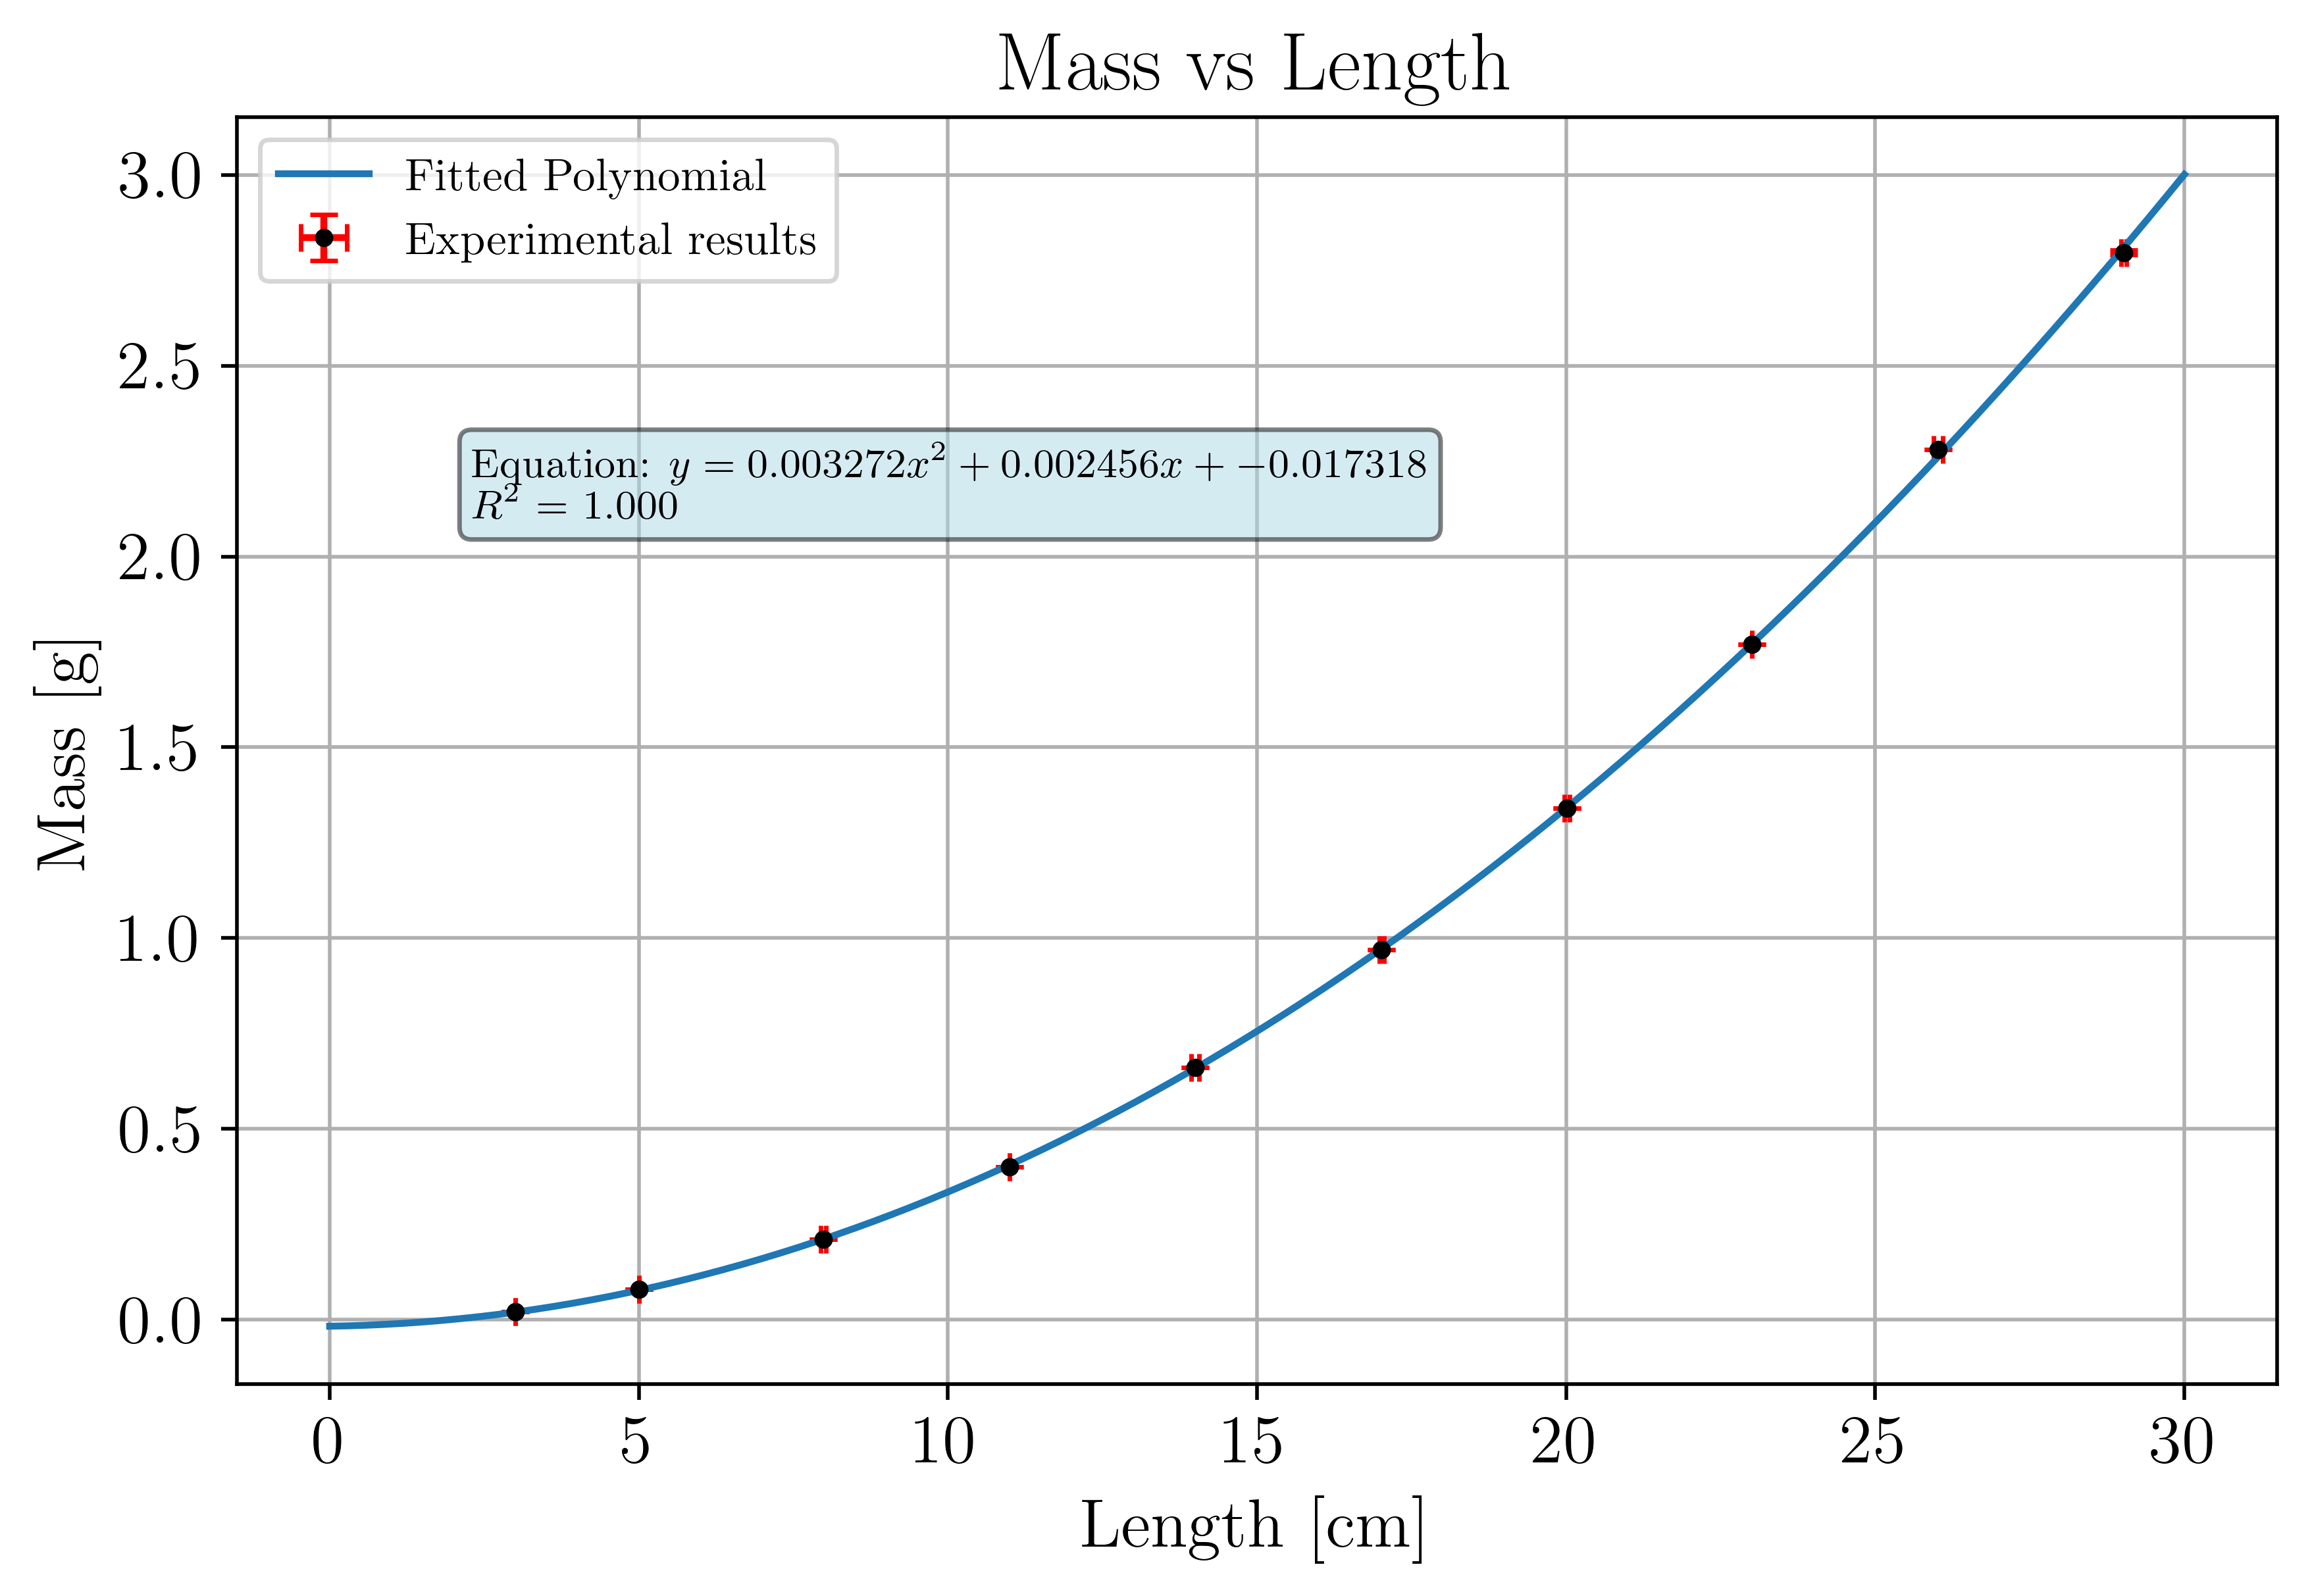

In [63]:
#Power Law fit
coefficients = np.polyfit(lengths, mass, 2)
poly_func = np.poly1d(coefficients)
print(coefficients)
x_fit = np.linspace(0, 30, 100)
y_fit = poly_func(x_fit)

r_squared = r2_score(mass, poly_func(lengths))
equation_str = f"$y = {coefficients[0]:.6f}x^2 + {coefficients[1]:.6f}x + {coefficients[2]:.6f}$"

fig, ax = plt.subplots(figsize=(8, 5), dpi = 500)

ax.errorbar(lengths,mass, xerr = dataexp_1['Error Length'], yerr = dataexp_1['Error Mass'],color = 'black', ecolor = "red",capsize = 3, fmt = '.',  label = 'Experimental results')
ax.plot(x_fit, y_fit, label='Fitted Polynomial')

# Enclose the text in a box
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
textstr = f"Equation: {equation_str}\n$R^2$ = {r_squared:.3f}"
plt.text(2.3, 2.3, textstr, fontsize=9, verticalalignment='top', bbox=props)

plt.xlabel('Length [cm]')
plt.ylabel('Mass [g]')
plt.title('Mass vs Length')
plt.grid()
plt.legend()
plt.show()

Linearization

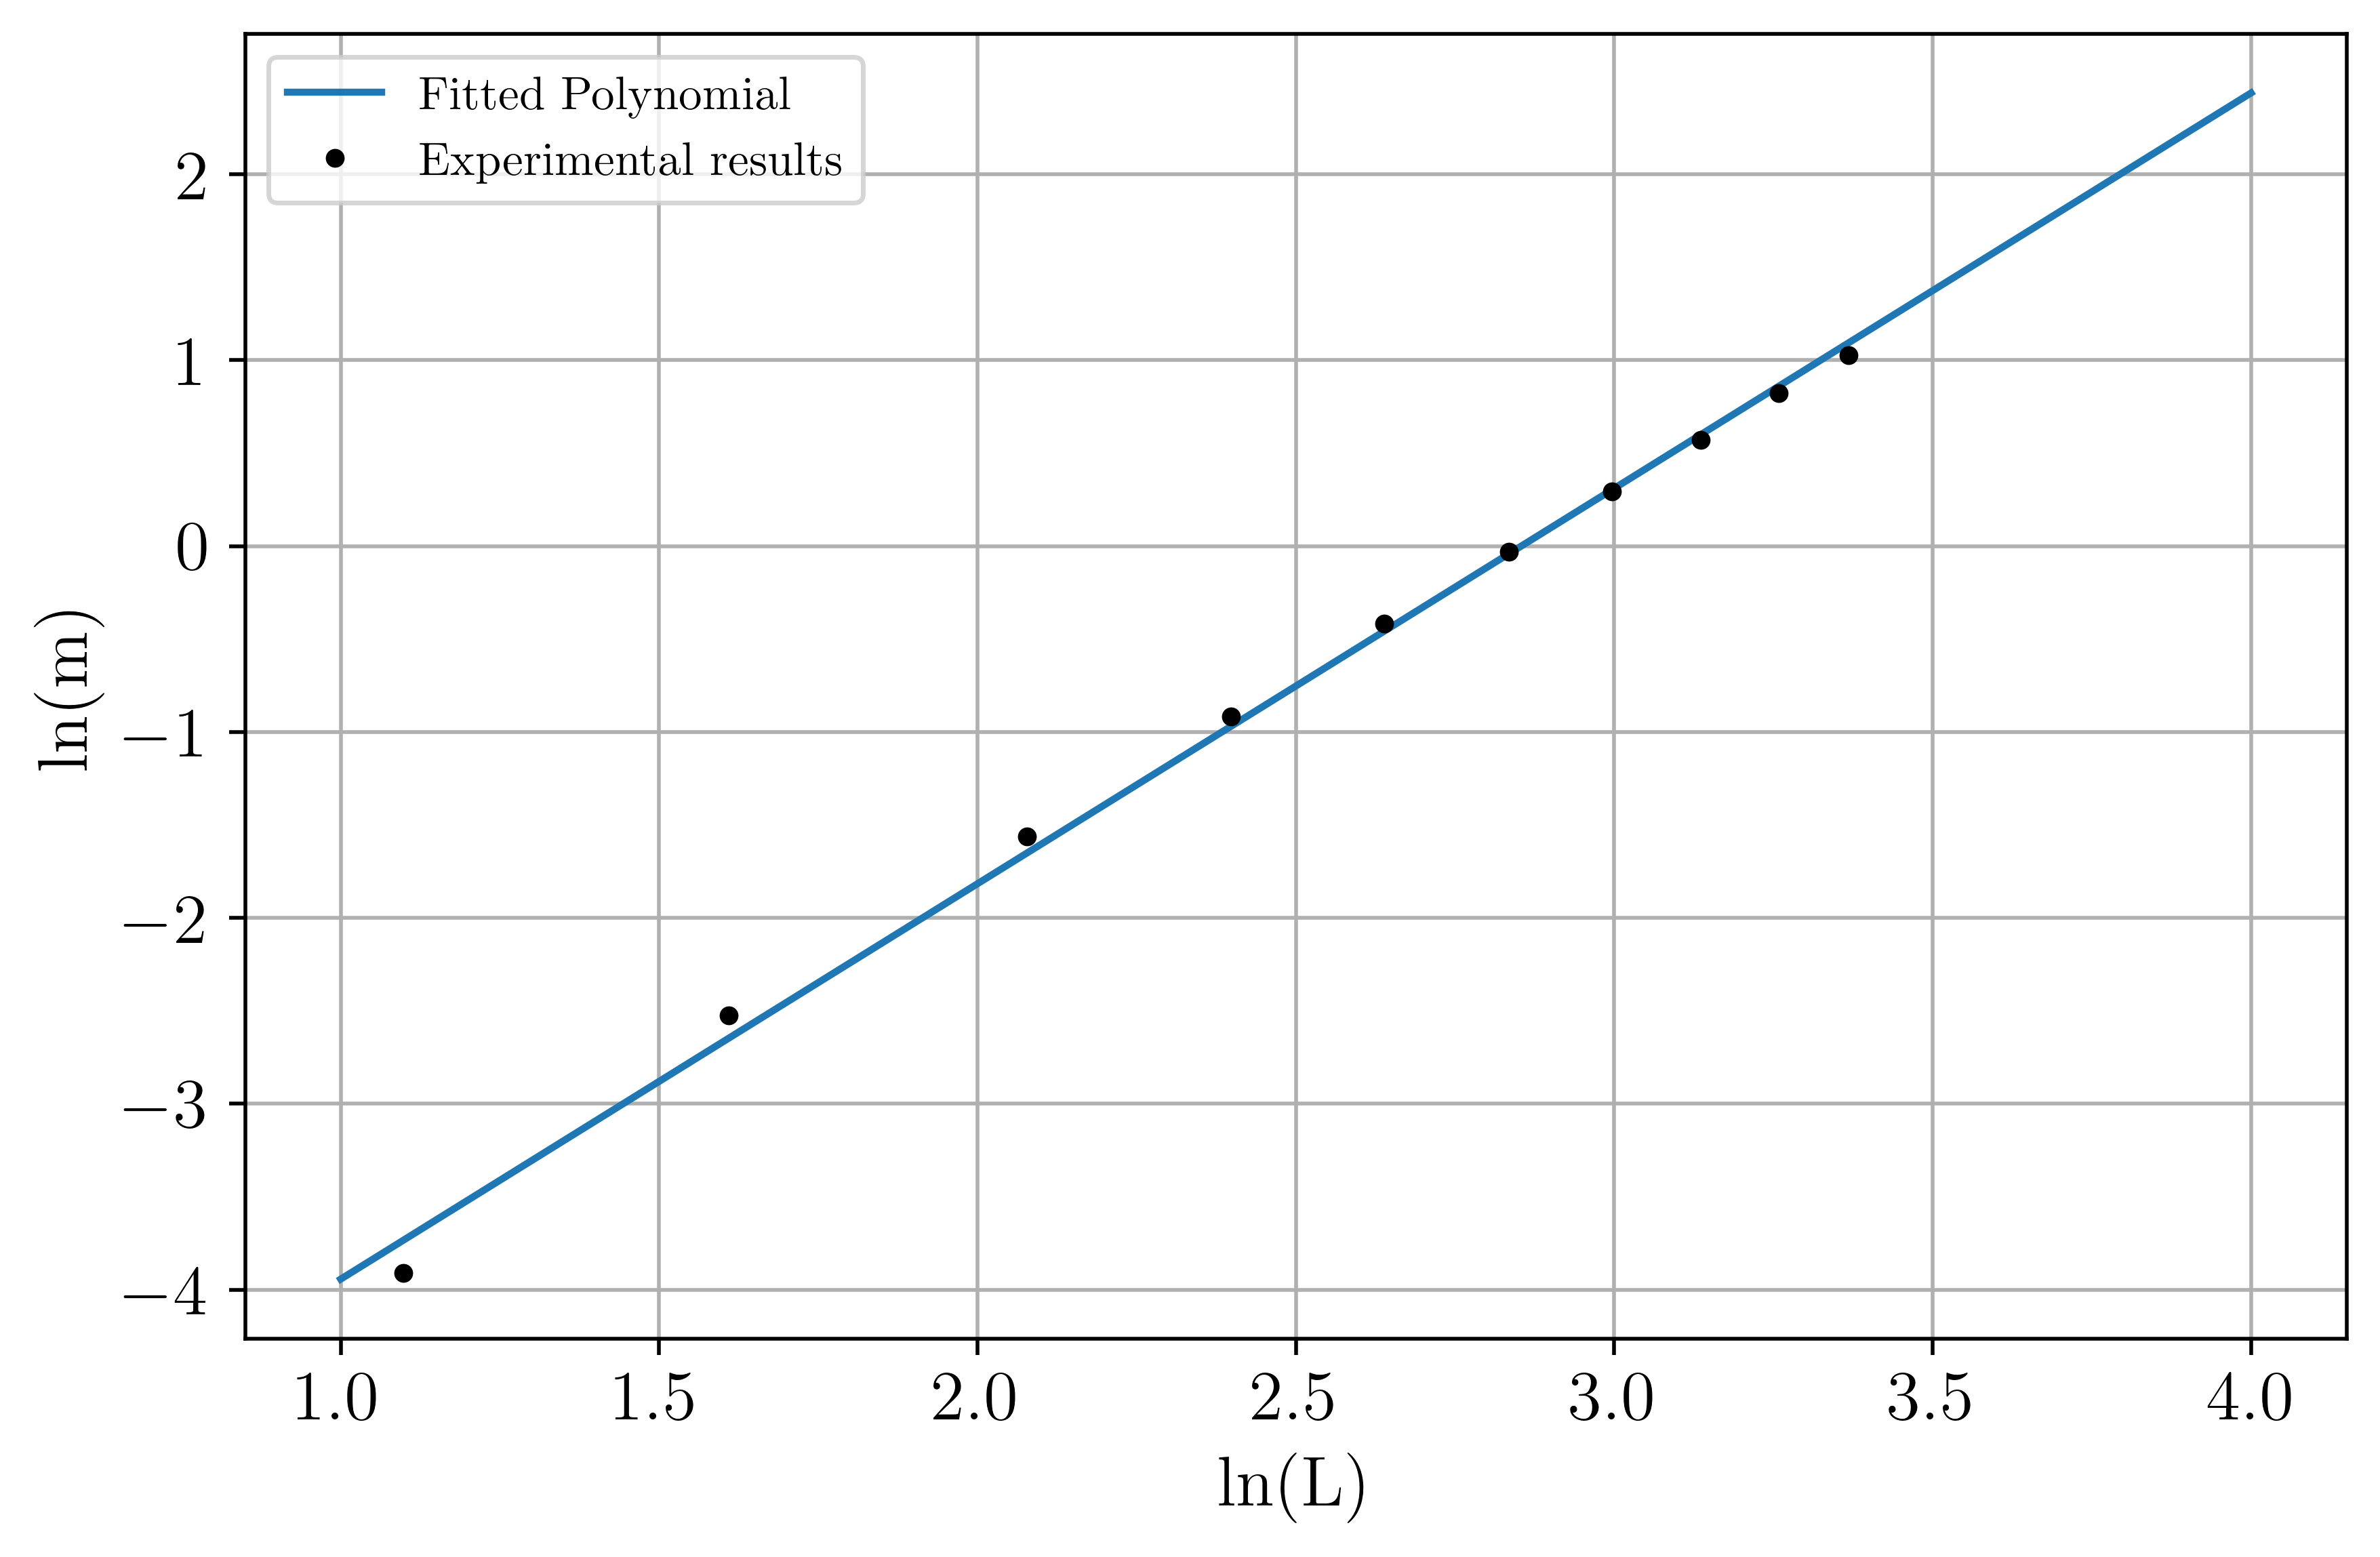

In [68]:
#Power Law fit
coefficients = np.polyfit(np.log(lengths), np.log(mass), 1)
poly_func = np.poly1d(coefficients)
x_fit = np.linspace(1, 4, 100)
y_fit = poly_func(x_fit)

r_squared = r2_score(np.log(mass), poly_func(np.log(lengths)))

fig, ax = plt.subplots(figsize=(8, 5), dpi = 500)

ax.errorbar(np.log(lengths),np.log(mass),color = 'black', ecolor = "red",capsize = 3, fmt = '.',  label = 'Experimental results')
ax.plot(x_fit, y_fit, label='Fitted Polynomial')

# Enclose the text in a box
#props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
#textstr = f"Equation: {equation_str}\n$R^2$ = {r_squared:.3f}"
#plt.text(2.3, 2.3, textstr, fontsize=9, verticalalignment='top', bbox=props)

plt.xlabel('ln(L)')
plt.ylabel('ln(m)')
plt.grid()
plt.legend()
plt.show()